In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Load the dataset
file_path = '../Upper ph.xlsx'
data = pd.read_excel(file_path)

# Prepare the dataset
features = []
labels = []

ph_levels = [7 , 8 , 9 , 10]
for ph in ph_levels:
    ph_data = data[['Frequency', f'S11 at {ph} pH', f'S21 at {ph} pH', f'phase S11 at {ph} pH', f'phase S21 at {ph} pH']]
    ph_data.columns = ['Frequency', 'S11', 'S21', 'phase S11', 'phase S21']
    ph_data['pH'] = ph
    features.append(ph_data)

# Combine all features
features = pd.concat(features, ignore_index=True)

# Normalize the features
scaler = StandardScaler()
features[['Frequency', 'S11', 'S21', 'phase S11', 'phase S21']] = scaler.fit_transform(features[['Frequency', 'S11', 'S21', 'phase S11', 'phase S21']])

# Split features and labels
X = features[['Frequency', 'S11', 'S21', 'phase S11', 'phase S21']]
y = features['pH']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the neural network model with more complexity and regularization
model = Sequential()
model.add(Dense(256, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

# Compile the model with a lower learning rate
optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='mse')

# Train the model
history = model.fit(X_train, y_train, epochs=500, batch_size=8, validation_split=0.2)

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')

Epoch 1/500


/tmp/ipykernel_323885/870596463.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ph_data['pH'] = ph
/tmp/ipykernel_323885/870596463.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ph_data['pH'] = ph
/tmp/ipykernel_323885/870596463.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returnin

3201/3201 ━━━━━━━━━━━━━━━━━━━━ 3s 664us/step - loss: 15.0312 - val_loss: 1.4499
Epoch 2/500
3201/3201 ━━━━━━━━━━━━━━━━━━━━ 2s 614us/step - loss: 2.6276 - val_loss: 1.3646
Epoch 3/500
3201/3201 ━━━━━━━━━━━━━━━━━━━━ 2s 624us/step - loss: 2.2625 - val_loss: 1.4048
Epoch 4/500
3201/3201 ━━━━━━━━━━━━━━━━━━━━ 2s 626us/step - loss: 2.0449 - val_loss: 1.4407
Epoch 5/500
3201/3201 ━━━━━━━━━━━━━━━━━━━━ 2s 646us/step - loss: 1.8669 - val_loss: 1.3886
Epoch 6/500
3201/3201 ━━━━━━━━━━━━━━━━━━━━ 2s 616us/step - loss: 1.7498 - val_loss: 1.3935
Epoch 7/500
3201/3201 ━━━━━━━━━━━━━━━━━━━━ 2s 622us/step - loss: 1.6610 - val_loss: 1.4345
Epoch 8/500
3201/3201 ━━━━━━━━━━━━━━━━━━━━ 2s 612us/step - loss: 1.5507 - val_loss: 1.2960
Epoch 9/500
3201/3201 ━━━━━━━━━━━━━━━━━━━━ 2s 622us/step - loss: 1.4852 - val_loss: 1.2963
Epoch 10/500
3201/3201 ━━━━━━━━━━━━━━━━━━━━ 2s 649us/step - loss: 1.3940 - val_loss: 1.2373
Epoch 11/500
3201/3201 ━━━━━━━━━━━━━━━━━━━━ 2s 619us/step - loss: 1.3628 - val_loss: 1.1621
Epoch 12

In [5]:
# Assuming the model is already trained and you have the data to predict
# Prepare new data for prediction (make sure to scale it the same way as training data)
new_data = pd.DataFrame({
    'Frequency': [4.0166],
    'S11': [-0.9357],
    'S21': [-17.85208],
    'phase S11': [-152.49893],
    'phase S21': [0.14894]
})

# Normalize the new data
new_data[['Frequency', 'S11', 'S21', 'phase S11', 'phase S21']] = scaler.transform(new_data[['Frequency', 'S11', 'S21', 'phase S11', 'phase S21']])

# Make predictions
predictions = model.predict(new_data)

# Print predictions
print(predictions)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
[[7.5770845]]


In [8]:
model.save("loss_only_8.h5")

2024-09-20 15:21:53.898124: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-09-20 15:21:53.898700: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-20 15:21:53.900743: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-20 15:21:53.907209: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-20 15:21:53.918769: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been 

Epoch 1/500
1601/1601 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 79.0571 - val_loss: 57.1370
Epoch 2/500
1601/1601 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 63.4748 - val_loss: 39.9523
Epoch 3/500
1601/1601 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 45.9756 - val_loss: 23.5210
Epoch 4/500
1601/1601 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 30.3968 - val_loss: 12.0053
Epoch 5/500
1601/1601 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 18.1994 - val_loss: 5.1208
Epoch 6/500
1601/1601 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 10.6964 - val_loss: 2.3630
Epoch 7/500
1601/1601 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 7.6353 - val_loss: 1.8904
Epoch 8/500
1601/1601 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 6.4007 - val_loss: 1.8658
Epoch 9/500
1601/1601 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 5.5129 - val_loss: 1.9427
Epoch 10/500
1601/1601 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 5.1340 - val_loss: 1.9082
Epoch 11/500
1601/1601 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 4.5658 - val_loss: 1.9309
Epoch 12/

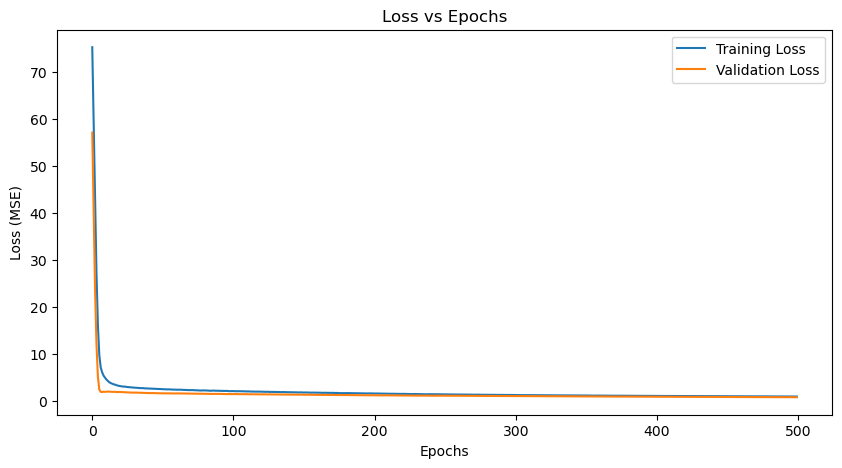

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Custom R² metric
from tensorflow.keras import backend as K

# def r2_keras(y_true, y_pred):
#     y_true = K.cast(y_true, 'float32')  # Ensure y_true is float32
#     SS_res = K.sum(K.square(y_true - y_pred))  # Residual sum of squares
#     SS_tot = K.sum(K.square(y_true - K.mean(y_true)))  # Total sum of squares
#     return (1 - SS_res / (SS_tot + K.epsilon()))

# Load the dataset (same as before)
file_path = '../Upper ph.xlsx'
data = pd.read_excel(file_path)

# Prepare the dataset (same as before)
features = []
ph_levels = [7 , 8 , 9 , 10]
for ph in ph_levels:
    ph_data = data[['Frequency', f'S11 at {ph} pH', f'S21 at {ph} pH', f'phase S11 at {ph} pH', f'phase S21 at {ph} pH']]
    ph_data.columns = ['Frequency', 'S11', 'S21', 'phase S11', 'phase S21']
    ph_data['pH'] = ph
    features.append(ph_data)

# Combine all features
features = pd.concat(features, ignore_index=True)

# Normalize the features
scaler = StandardScaler()
features[['Frequency', 'S11', 'S21', 'phase S11', 'phase S21']] = scaler.fit_transform(features[['Frequency', 'S11', 'S21', 'phase S11', 'phase S21']])

# Split features and labels
X = features[['Frequency', 'S11', 'S21', 'phase S11', 'phase S21']]
y = features['pH']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build a more powerful neural network
model = Sequential()

# Add layers with Batch Normalization and Dropout
model.add(Dense(512, input_dim=X_train.shape[1], activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(32, activation='relu'))
model.add(Dense(1))

# Compile the model
optimizer = Adam(learning_rate=0.00001)
model.compile(optimizer=optimizer, loss='mse')

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, epochs=500, batch_size=16, validation_split=0.2, callbacks=[early_stopping])

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')

# Predict on test data
y_pred = model.predict(X_test)

# Calculate R² Score for the test data
r2 = r2_score(y_test, y_pred)
print(f'R² Score (Test Set): {r2:.4f}')

# Plot the training and validation loss
plt.figure(figsize=(10, 5))

# Plot loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()

plt.show()

In [5]:
# Assuming the model is already trained and you have the data to predict
# Prepare new data for prediction (make sure to scale it the same way as training data)
new_data = pd.DataFrame({
    'Frequency': [4.0166],
    'S11': [-0.9357],
    'S21': [-17.85208],
    'phase S11': [-152.49893],
    'phase S21': [0.14894]
})

# Normalize the new data
new_data[['Frequency', 'S11', 'S21', 'phase S11', 'phase S21']] = scaler.transform(new_data[['Frequency', 'S11', 'S21', 'phase S11', 'phase S21']])

# Make predictions
predictions = model.predict(new_data)

# Print predictions
print(predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
[[7.5497007]]
